In [1]:
path = '../cuongdv-round2/logs/solver_v5.log'

In [2]:
import re

In [3]:

with open(path, 'r') as f:
    lines = f.readlines()

print(lines)

['2024-09-22 01:20:46,007 - Solving Seed-2521 - Initial solution: 0\n', '2024-09-22 01:20:46,022 - Solving Seed-8053 - Initial solution: 0\n', '2024-09-22 01:20:46,022 - Solving Seed-1097 - Initial solution: 0\n', '2024-09-22 01:20:46,022 - Solving Seed-9221 - Initial solution: 0\n', '2024-09-22 01:20:46,038 - Solving Seed-2381 - Initial solution: 0\n', '2024-09-22 01:20:46,069 - Solving Seed-9859 - Initial solution: 0\n', '2024-09-22 01:20:46,069 - Solving Seed-6047 - Initial solution: 0\n', '2024-09-22 01:20:46,085 - Solving Seed-6829 - Initial solution: 0\n', '2024-09-22 01:20:46,085 - Solving Seed-8677 - Initial solution: 0\n', '2024-09-22 01:20:46,085 - Solving Seed-5351 - Initial solution: 0\n', '2024-09-22 01:20:56,799 - Solving Seed-5351 - Added 32021 servers with total gain 1365200359.6778126\n', '2024-09-22 01:20:56,799 - Solving Seed-5351 - New best solution: 1365200359.6778126\n', '2024-09-22 01:20:57,018 - Solving Seed-6829 - Added 36765 servers with total gain 1159630145.

In [4]:
def process_msg(msg):
    words = msg.split(' ')
    action = words[0]
    if words[0] in ('Removed', 'Added', 'Merged'):
        value = float(words[6])
        addition_value = int(words[1])
    elif words[0] == 'Initial':
        value = float(words[2])
        addition_value = None
    elif words[0] == 'New':
        value = float(words[3])
        addition_value = None
    elif words[0] == 'Optimized':
        value = float(words[5])
        addition_value = None
    elif words[0] == 'Adjusted':
        value = float(words[6])
        addition_value = None
    else:
        print(msg)

    return {
        'action': action,
        'value': value,
        'addition_value': addition_value,
    }


In [5]:
seeds = {}
## init
pattern = r'(\d{4}-\d{2}-\d{2}) (\d{2}:\d{2}:\d{2},\d{3}) - (.+?) - (.+)'
for line in lines:
    match = re.match(pattern, line)
    if match:
        date = match.group(1)
        time = match.group(2)
        seed = match.group(3)
        message = match.group(4)
        if seed not in seeds:
            seeds[seed] = []
        action = process_msg(message)
        seeds[seed].append((date, time, action))

In [6]:
for _, time , action in seeds['Solving Seed-2381']:
    print(f"{time} - {action}")

01:20:46,038 - {'action': 'Initial', 'value': 0.0, 'addition_value': None}
01:20:57,670 - {'action': 'Added', 'value': 1664456402.2051692, 'addition_value': 40631}
01:20:57,670 - {'action': 'New', 'value': 1664456402.2051692, 'addition_value': None}
01:21:18,469 - {'action': 'Merged', 'value': 3619960.835526943, 'addition_value': 550}
01:21:18,594 - {'action': 'New', 'value': 1668076363.0406961, 'addition_value': None}
01:24:15,302 - {'action': 'Removed', 'value': 160800255.7866416, 'addition_value': 7849}
01:24:15,302 - {'action': 'New', 'value': 1828876618.8273377, 'addition_value': None}
01:24:22,412 - {'action': 'Added', 'value': 22932671.624739885, 'addition_value': 9534}
01:24:22,412 - {'action': 'New', 'value': 1851809290.4520776, 'addition_value': None}
01:24:33,503 - {'action': 'Merged', 'value': 2023314.3128917217, 'addition_value': 235}
01:24:33,660 - {'action': 'New', 'value': 1853832604.7649693, 'addition_value': None}
01:27:55,542 - {'action': 'Removed', 'value': 84918492

In [7]:
# keys = [
#     'Removed',
#     'Added',
#     'Merged',
#     'Initial solution',
#     'Optimized selling prices with gain',
#     'New best solution: '

# ]


# # Removed 4418 servers with total gain 90310206.3448565
# # Added 23831 servers with total gain 610599164.3234487
# # Merged 363 servers with total gain 2474552.88818264
# # Initial solution: 1088137017.386087
# # Optimized selling prices with gain 89676294.36457682
# # New best solution: 2009791949.0030189

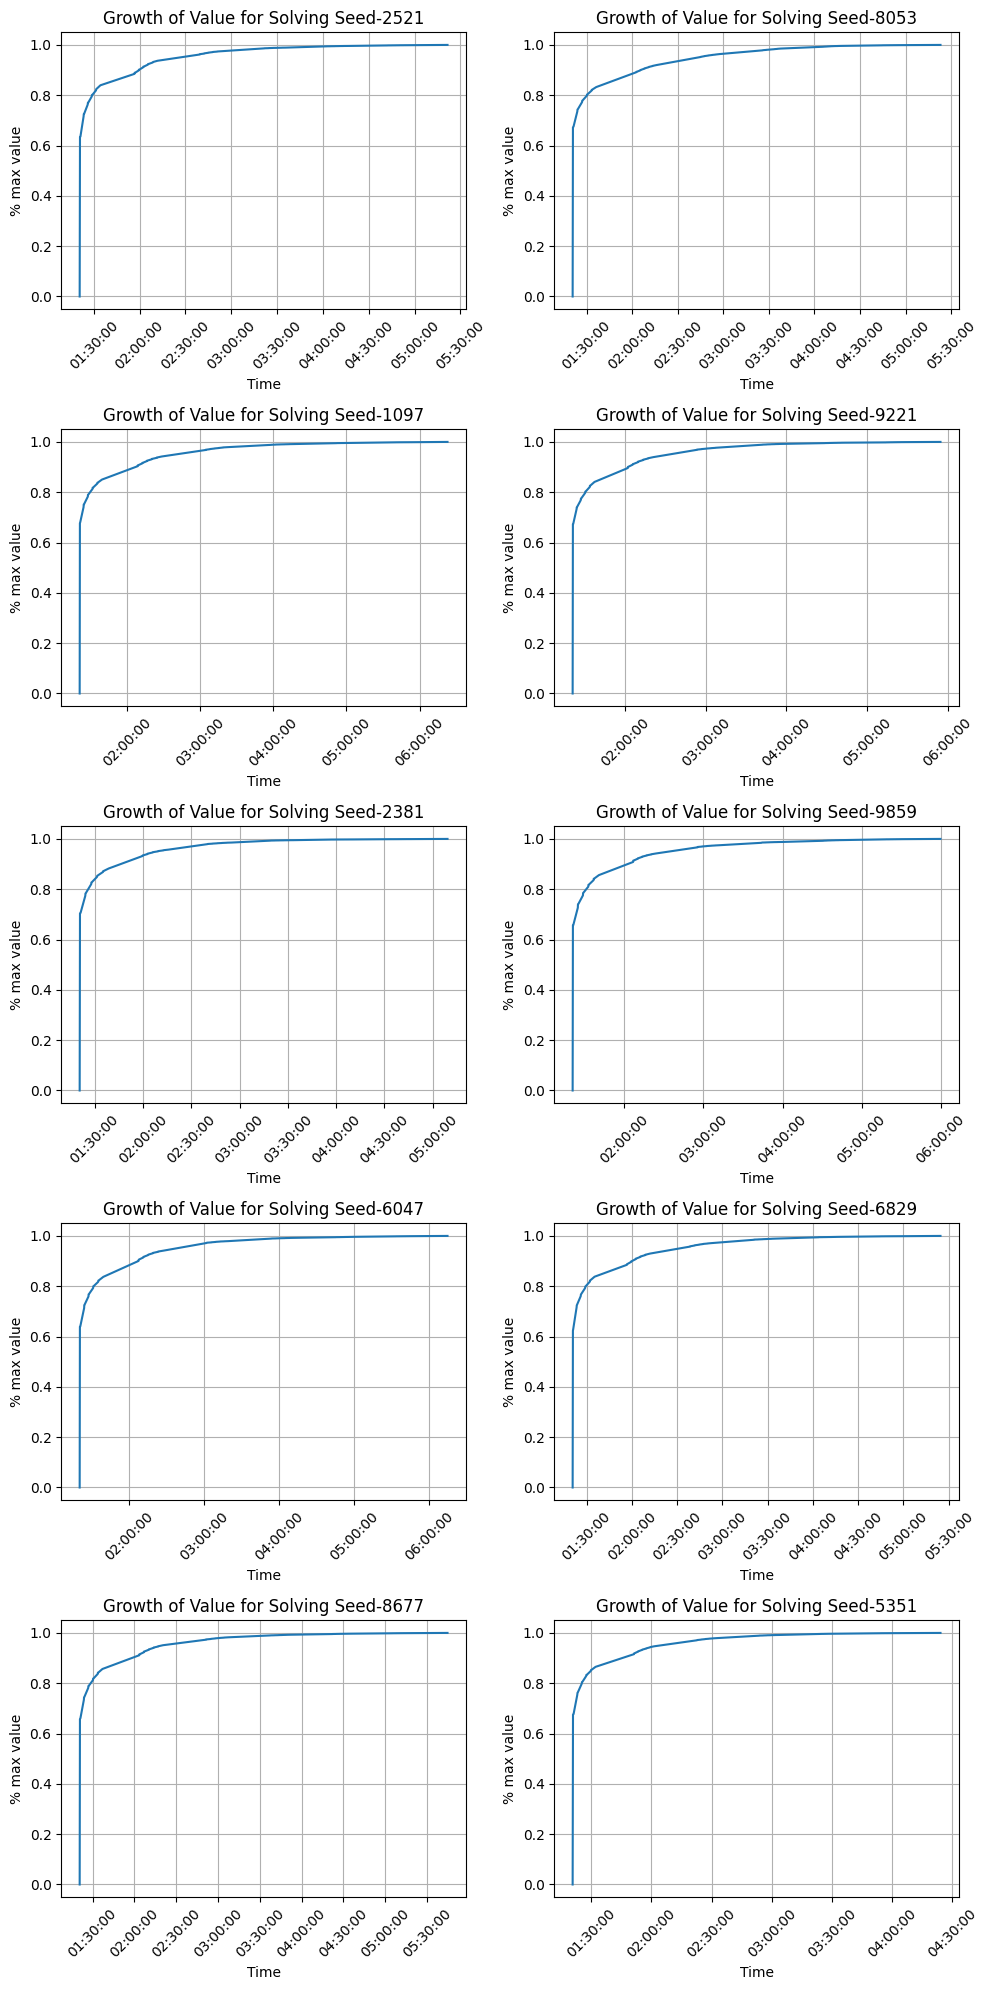

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime
# Chuẩn bị dữ liệu cho đồ thị
times = []
values = []

fig, axs = plt.subplots(5, 2, figsize=(10, 20))
axs = axs.flatten()  # Chuyển đổi thành một mảng 1 chiều để dễ dàng truy cập


for idx, seed in enumerate(seeds):
    times = []
    values = []

    # convert to percentage
    count = 0 
    for _, _, action in reversed(seeds[seed]):
        if action['action'] == 'New':
            max_profit = action['value']
            count = count + 1
            if count==2:
                break


    for date, time, action in seeds[seed][:-1]:
        if action['action'] in ('New', 'Initial'):
            datetime_str = f"{date} {time}"
            time_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S,%f')
            times.append(time_obj)
            values.append(action['value'] / max_profit)

    # Vẽ đồ thị cho seed hiện tại
    axs[idx].plot(times, values)
    axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    axs[idx].set_title(f'Growth of Value for {seed}')
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('% max value')
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].grid()

# Cải thiện hiển thị
plt.tight_layout()
plt.show()


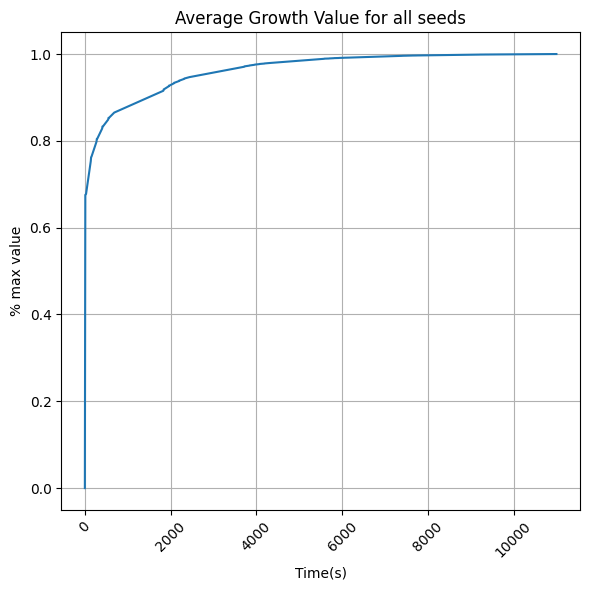

In [41]:
# Tạo figure cho plot
fig, ax = plt.subplots(figsize=(6,6))

# Khởi tạo danh sách để lưu thời gian và giá trị
times = []
values = []


def time_convert_benefit(s):
    time_format = "%H:%M:%S,%f"  # Định dạng thời gian
    tmp = datetime.strptime(s, time_format)
    return tmp


# Chọn seed cụ thể
fixed_seed = 'Solving Seed-5351'

# Tính toán giá trị tối đa
count = 0 
max_profit = 1  # Giá trị mặc định, sẽ được cập nhật
for _, _, action in reversed(seeds[fixed_seed]):
    if action['action'] == 'New':
        max_profit = action['value']
        count += 1
        if count == 2:
            break

# find the 1st time
first_time = time_convert_benefit(seeds[fixed_seed][0][1])

# Lấy dữ liệu cho đồ thị
for date, time, action in seeds[fixed_seed][:-1]:
    if action['action'] in ('New', 'Initial'):
        datetime_str = f"{time}"
        time_tmp = datetime.strptime(datetime_str, '%H:%M:%S,%f')
        time_obj = (time_tmp - first_time).total_seconds()
        times.append(time_obj)
        values.append(action['value'] / max_profit)

# Vẽ đồ thị cho seed hiện tại
ax.plot(times, values)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.set_title('Average Growth Value for all seeds')
ax.set_xlabel('Time(s)')
ax.set_ylabel('% max value')
ax.tick_params(axis='x', rotation=45)
ax.grid()

# Cải thiện hiển thị
plt.tight_layout()
plt.show()

In [9]:
# calculate time

from datetime import datetime

def time_convert(s):
    time_format = "%H:%M:%S,%f"  # Định dạng thời gian
    tmp = datetime.strptime(s, time_format)
    return tmp

for seed in seeds:
    for idx, (date, time, action) in enumerate(seeds[seed]):
        if action['action'] in ('New', 'Initial'):
            start_process_time = time
            seeds[seed][idx] = (date, time, {**action, 'process_time': 0})  # Cập nhật action
        else:
            process_time = (time_convert(time) - time_convert(start_process_time)).total_seconds()
            seeds[seed][idx] = (date, time, {**action, 'process_time': process_time})  # Cập nhật action

    

In [10]:
for seed in seeds.keys():
    print(seed)
    for _, time, action in seeds[seed]:
        print(f"{time} - {action}")

Solving Seed-2521
01:20:46,007 - {'action': 'Initial', 'value': 0.0, 'addition_value': None, 'process_time': 0}
01:20:58,404 - {'action': 'Added', 'value': 1118047038.6872332, 'addition_value': 35123, 'process_time': 12.397}
01:20:58,404 - {'action': 'New', 'value': 1118047038.6872332, 'addition_value': None, 'process_time': 0}
01:21:14,316 - {'action': 'Merged', 'value': 1521707.1500806808, 'addition_value': 29, 'process_time': 15.912}
01:21:14,472 - {'action': 'New', 'value': 1119568745.837314, 'addition_value': None, 'process_time': 0}
01:23:20,039 - {'action': 'Removed', 'value': 142093330.861063, 'addition_value': 7866, 'process_time': 125.567}
01:23:20,039 - {'action': 'New', 'value': 1261662076.698377, 'addition_value': None, 'process_time': 0}
01:23:28,269 - {'action': 'Added', 'value': 17446361.304666758, 'addition_value': 8641, 'process_time': 8.23}
01:23:28,269 - {'action': 'New', 'value': 1279108438.0030437, 'addition_value': None, 'process_time': 0}
01:23:39,305 - {'action

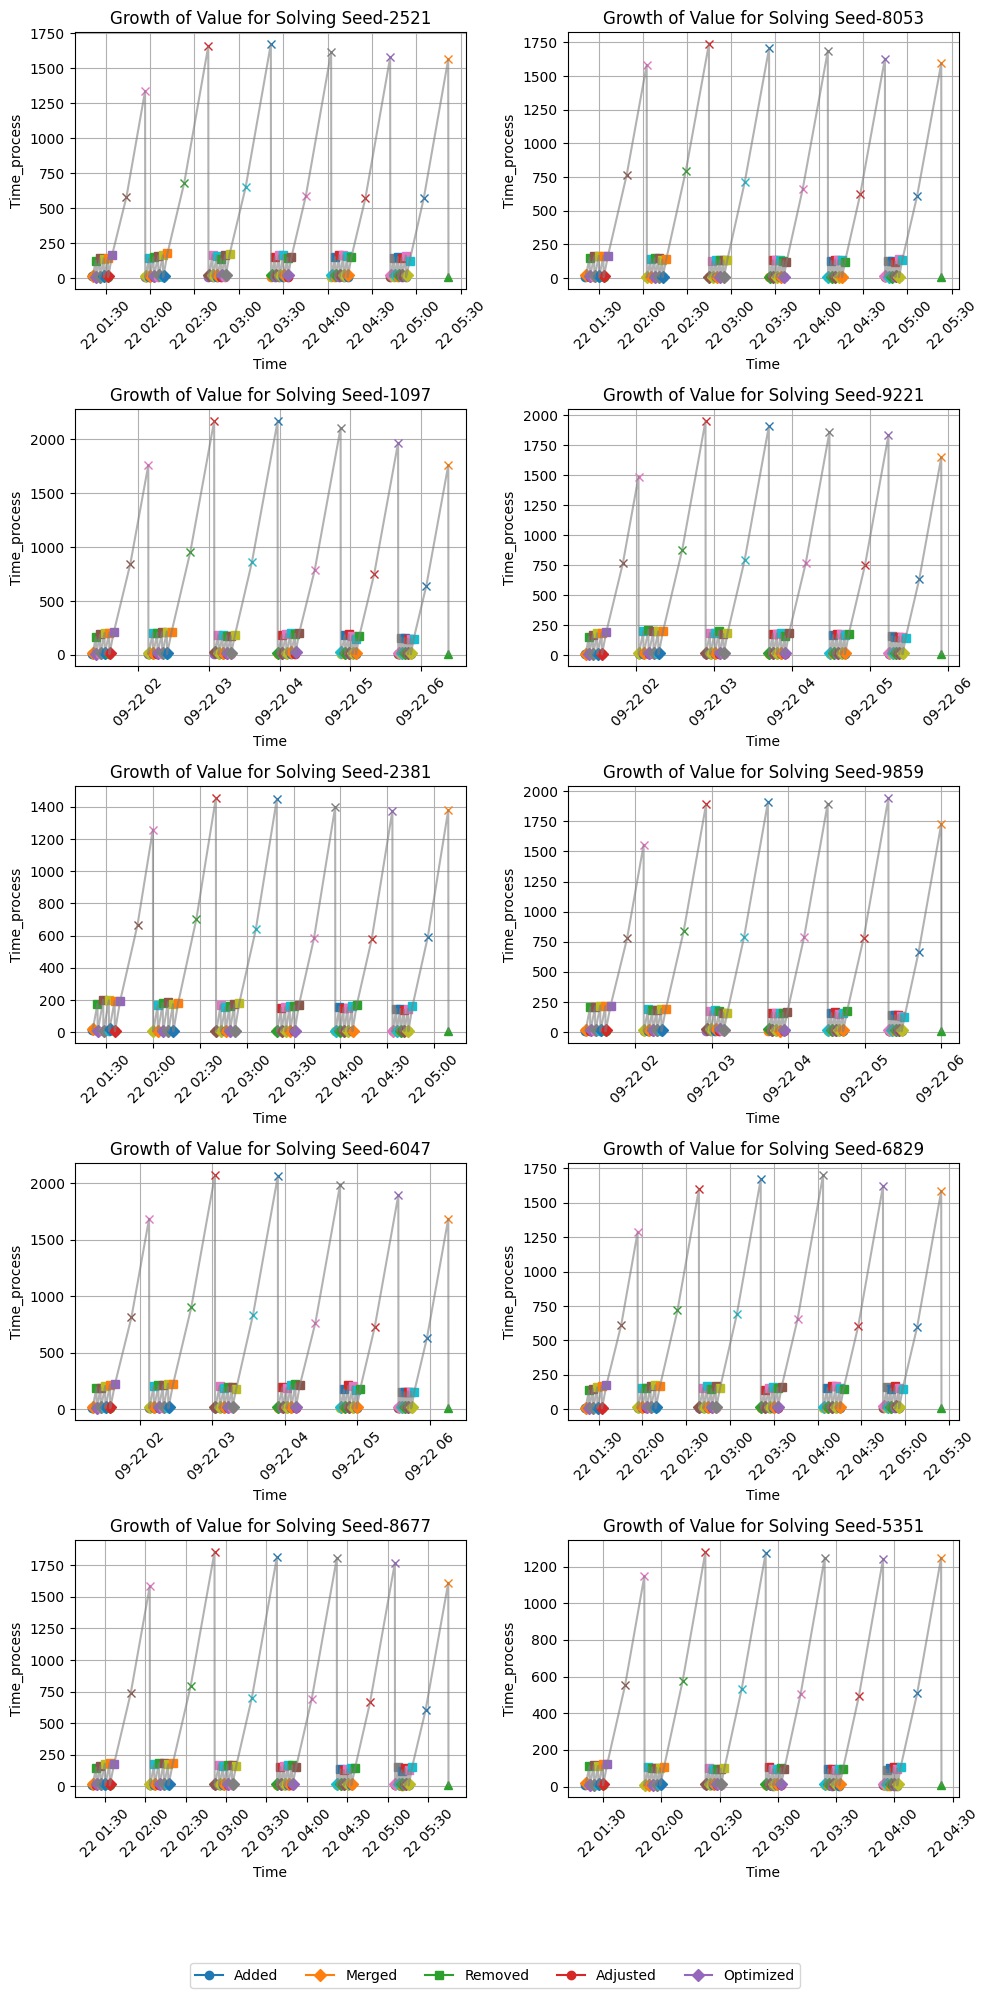

In [11]:
import matplotlib.pyplot as plt
from datetime import datetime
# Chuẩn bị dữ liệu cho đồ thị
times = []
values = []

# Tạo figure và axes cho plot 5x2
fig, axs = plt.subplots(5, 2, figsize=(10, 20))
axs = axs.flatten()  # Chuyển đổi thành một mảng 1 chiều để dễ dàng truy cập

marker_map = {
    'Added': 'o',      # Hình tròn
    'Optimized': '^',  # Hình tam giác
    'Removed': 's',    # Hình vuông
    'Merged': 'D',     # Hình thoi
    'Adjust': 'x'
}

# Danh sách để lưu nhãn cho legend
legend_labels = []

for idx, seed in enumerate(seeds):
    times = []
    values = []

    for date, time, action in seeds[fixed_seed]:
        if action['process_time'] > 0:
            datetime_str = f"{date} {time}"
            time_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S,%f')
            times.append(time_obj)
            values.append(action['process_time'])
            marker = marker_map.get(action['action'], 'x')
            axs[idx].plot(time_obj, action['process_time'], marker=marker)
            # Thêm nhãn vào legend nếu chưa có
            if action['action'] not in legend_labels:
                legend_labels.append(action['action'])

    axs[idx].plot(times, values, color='gray', linestyle='-', alpha=0.6)  # Đường nối
    axs[idx].set_title(f'Growth of Value for {seed}')
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Time_process')
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].grid()

# Thêm legend chung ở vị trí lower center
fig.legend(legend_labels, loc='lower center', ncol=len(legend_labels), bbox_to_anchor=(0.5, 0))

# Cải thiện hiển thị
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Điều chỉnh để tránh chồng chéo với legend
plt.show()

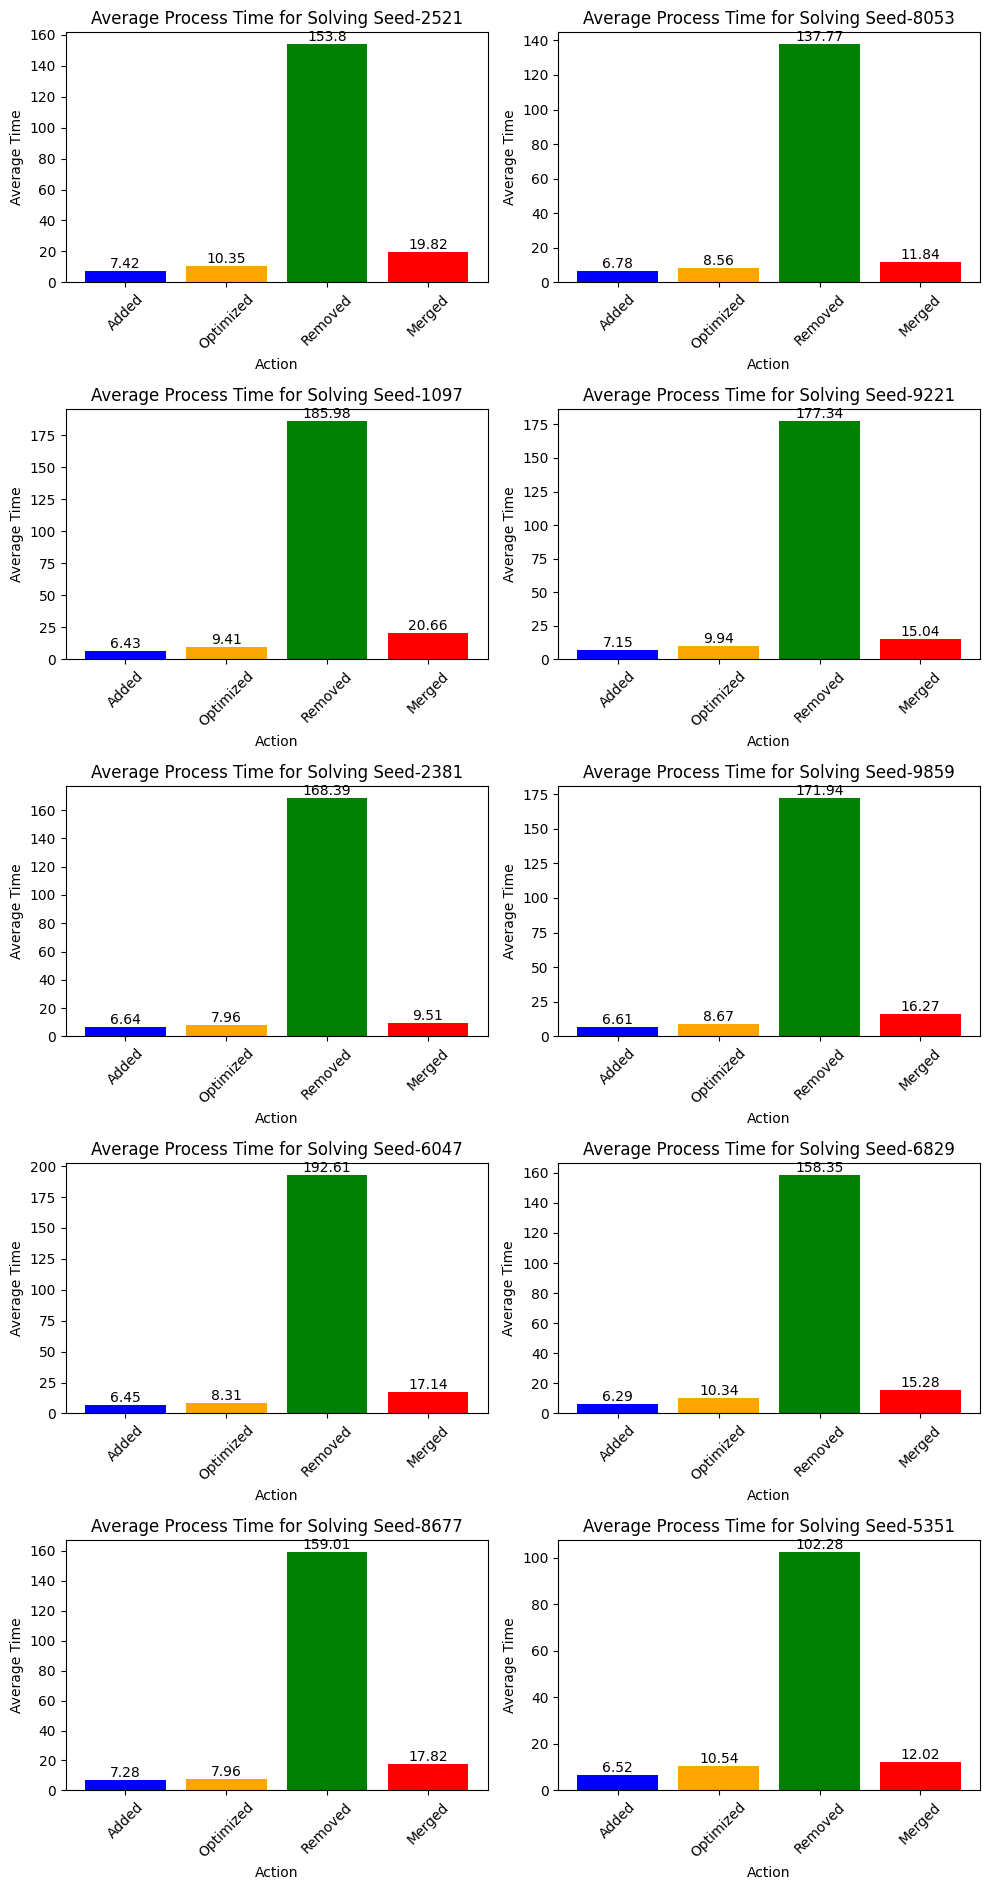

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
# Chuẩn bị dữ liệu cho đồ thị
times = []
values = []

# Tạo figure và axes cho plot 5x2
fig, axs = plt.subplots(5, 2, figsize=(10, 20))
axs = axs.flatten()  # Chuyển đổi thành một mảng 1 chiều để dễ dàng truy cập

# const
ADDED = 'Added'
OPTIMIZED = 'Optimized'
REMOVED = 'Removed'
MERGED = 'Merged'
ADJUST = 'Adjusted'

ACTION_KEYS = [ADDED, OPTIMIZED, REMOVED, MERGED, ADJUST]

# 

# Danh sách để lưu nhãn cho legend
legend_labels = []

for idx, seed in enumerate(seeds):
    times = []
    values = {
        key: [0, 0] for key in ACTION_KEYS[:-1]
    }

    for date, time, action in seeds[seed]:
        if action['process_time'] > 0:
            # action in action_keys
            act = action['action']
            if act == ADJUST:
                continue
            process_time = action['process_time']
            # update values dict
            values[act][0] = values[act][0] + process_time
            values[act][1] = values[act][1] + 1

    draw_value = {act_key: values[act_key][0] /values[act_key][1] for act_key in ACTION_KEYS[:-1]}
    # Vẽ biểu đồ bar cho các giá trị trung bình
    axs[idx].bar(draw_value.keys(), draw_value.values(), color=['blue', 'orange', 'green', 'red'])

    # Thêm giá trị lên trên đỉnh các cột
    for bar in axs[idx].containers[0]:
        yval = bar.get_height()
        axs[idx].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    axs[idx].set_title(f'Average Process Time for {seed}')
    axs[idx].set_xlabel('Action')
    axs[idx].set_ylabel('Average Time')
    axs[idx].tick_params(axis='x', rotation=45)

# Thêm legend chung ở vị trí lower center
legend_labels = ACTION_KEYS  # Nhãn cho legend

# Cải thiện hiển thị
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Điều chỉnh để tránh chồng chéo với legend
plt.show()

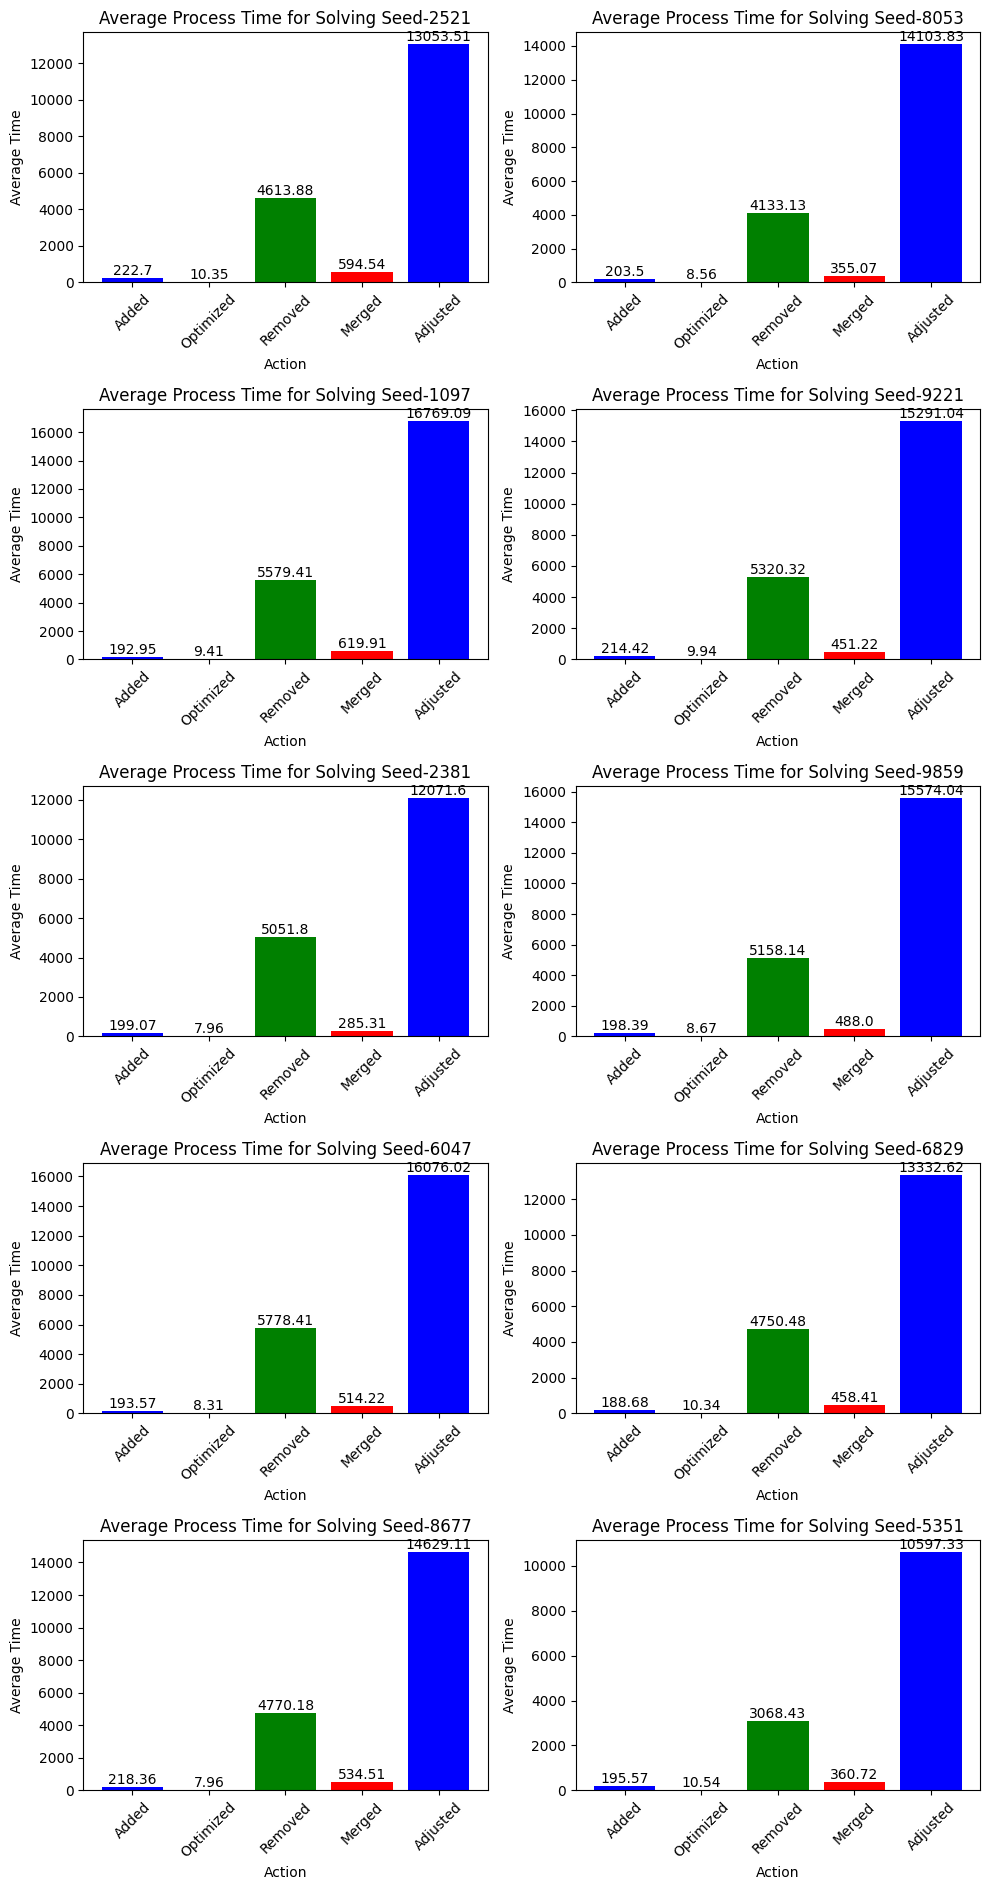

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
# Chuẩn bị dữ liệu cho đồ thị
times = []
values = []

# Tạo figure và axes cho plot 5x2
fig, axs = plt.subplots(5, 2, figsize=(10, 20))
axs = axs.flatten()  # Chuyển đổi thành một mảng 1 chiều để dễ dàng truy cập

# const
ADDED = 'Added'
OPTIMIZED = 'Optimized'
REMOVED = 'Removed'
MERGED = 'Merged'
ADJUST = 'Adjusted'

ACTION_KEYS = [ADDED, OPTIMIZED, REMOVED, MERGED, ADJUST]

# 

# Danh sách để lưu nhãn cho legend
legend_labels = []

for idx, seed in enumerate(seeds):
    times = []
    values = {
        key: [0, 0] for key in ACTION_KEYS
    }

    for date, time, action in seeds[seed]:
        if action['process_time'] > 0:
            # action in action_keys
            act = action['action']
            # if act == ADJUST:
            #     continue
            process_time = action['process_time']
            # update values dict
            values[act][0] = values[act][0] + process_time
            values[act][1] = values[act][1] + 1

    draw_value = {act_key: values[act_key][0] for act_key in ACTION_KEYS}
    # Vẽ biểu đồ bar cho các giá trị trung bình
    axs[idx].bar(draw_value.keys(), draw_value.values(), color=['blue', 'orange', 'green', 'red'])

    # Thêm giá trị lên trên đỉnh các cột
    for bar in axs[idx].containers[0]:
        yval = bar.get_height()
        axs[idx].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    axs[idx].set_title(f'Average Process Time for {seed}')
    axs[idx].set_xlabel('Action')
    axs[idx].set_ylabel('Average Time')
    axs[idx].tick_params(axis='x', rotation=45)

# Thêm legend chung ở vị trí lower center
legend_labels = ACTION_KEYS  # Nhãn cho legend

# Cải thiện hiển thị
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Điều chỉnh để tránh chồng chéo với legend
plt.show()

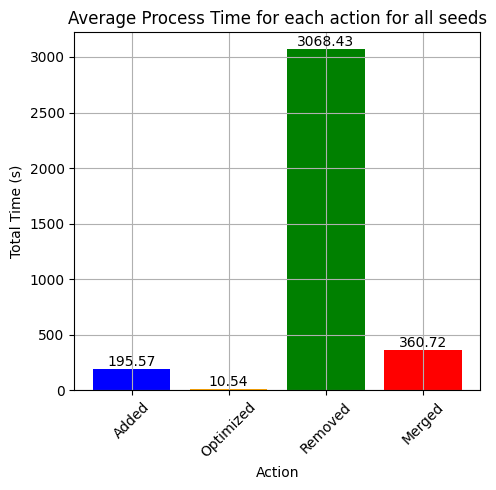

In [42]:
# Xác định seed cố định
fixed_seed = 'Solving Seed-5351'

# Tạo figure cho plot
fig, ax = plt.subplots(figsize=(5, 5))

# const
ADDED = 'Added'
OPTIMIZED = 'Optimized'
REMOVED = 'Removed'
MERGED = 'Merged'
ADJUST = 'Adjusted'

ACTION_KEYS = [ADDED, OPTIMIZED, REMOVED, MERGED]

# Khởi tạo từ điển để lưu tổng thời gian
values = {key: 0 for key in ACTION_KEYS}

# Lấy dữ liệu cho seed cố định
for date, time, action in seeds[fixed_seed]:
    if action['process_time'] > 0:
        act = action['action']
        if action == ADJUST:
            continue
        process_time = action['process_time']
        if act in values:
            values[act] += process_time

# Vẽ biểu đồ bar cho tổng thời gian
ax.bar(values.keys(), values.values(), color=['blue', 'orange', 'green', 'red', 'purple'])

# Thêm giá trị lên trên đỉnh các cột
for bar in ax.containers[0]:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Thiết lập tiêu đề và nhãn
ax.set_title(f'Average Process Time for each action for all seeds')
ax.set_xlabel('Action')
ax.set_ylabel('Total Time (s)')
ax.tick_params(axis='x', rotation=45)
ax.grid()

# Cải thiện hiển thị
plt.tight_layout()
plt.show()